In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [6]:
img_size = (224, 224)  
train_dir = 'train'  
validation_dir = 'val'  


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,               
    rotation_range=30,           
    width_shift_range=0.2,        
    height_shift_range=0.2,       
    shear_range=0.2,              
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,        
    batch_size=32,               
    class_mode='categorical',    
    shuffle=True                 
)


Found 11517 images belonging to 5 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,              
    target_size=img_size,         
    batch_size=32,                
    class_mode='categorical',     
    shuffle=False                
)


Found 2823 images belonging to 5 classes.


In [12]:
num_classes=4
model = models.Sequential([
        # # Convolutional layer 1
        # layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
        # layers.MaxPooling2D((2, 2)),
        
        # # Convolutional layer 2
        # layers.Conv2D(64, (3, 3), activation='relu'),
        # layers.MaxPooling2D((2, 2)),
        
        # # Convolutional layer 3
        # layers.Conv2D(128, (3, 3), activation='relu'),
        # layers.MaxPooling2D((2, 2)),
        
        # # Flatten the 3D data to 1D for the dense layers
        # layers.Flatten(),
        
        # # Fully connected layer 1
        # layers.Dense(128, activation='relu'),
        
        # # Output layer: softmax activation for multi-class classification
        # layers.Dense(num_classes, activation='softmax')
        layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(img_size[0],img_size[1],3)),
       layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2),strides=(2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2),strides=(2,2)),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2),strides=(2,2)),

        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2),strides=(2,2)),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
       layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
        
    ])


In [13]:
  model.compile(optimizer='adam',  
                  loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
                  metrics=['accuracy'])  # Track accuracy during training
    


In [14]:
model.compile(optimizer='adam',  
                  loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
                  metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [ ]:
history = model.fit(
    train_generator,               # Training data
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of steps per epoch
    epochs=10,                     # Number of epochs to train
    validation_data=validation_generator,  # Validation data
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Number of validation steps per epoch
)


Epoch 1/10
351/351 [==============================] - 16471s 47s/step - loss: 1.3868 - accuracy: 0.2844 - val_loss: 1.3775 - val_accuracy: 0.2863
Epoch 2/10
 24/351 [=>............................] - ETA: 4:04:09 - loss: 1.3839 - accuracy: 0.2669

In [18]:
model.save('plastic_classification_model.h5')

c:\users\sanka\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


88/88 [==============================] - 71s 806ms/step - loss: 1.3871 - accuracy: 0.2496
Validation Loss: 1.3871, Validation Accuracy: 0.2496


In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [12]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [13]:
for layer in vgg16_base.layers:
    layer.trainable = False

In [14]:
x = Flatten()(vgg16_base.output)  # Flatten output of the convolutional base
x = Dense(256, activation='relu')(x)  # Fully connected layer
x = Dense(train_generator.num_classes, activation='softmax')(x) 

In [15]:
model = Model(inputs=vgg16_base.input, outputs=x)

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10
360/360 [==============================] - 1176s 3s/step - loss: 0.8194 - accuracy: 0.7129 - val_loss: 0.3433 - val_accuracy: 0.8838
Epoch 2/10
360/360 [==============================] - 1143s 3s/step - loss: 0.5277 - accuracy: 0.7999 - val_loss: 0.3231 - val_accuracy: 0.8842
Epoch 3/10
360/360 [==============================] - 1146s 3s/step - loss: 0.4166 - accuracy: 0.8450 - val_loss: 0.2796 - val_accuracy: 0.8927
Epoch 4/10
360/360 [==============================] - 1111s 3s/step - loss: 0.3973 - accuracy: 0.8476 - val_loss: 0.2390 - val_accuracy: 0.9122
Epoch 5/10
360/360 [==============================] - 1120s 3s/step - loss: 0.3575 - accuracy: 0.8631 - val_loss: 0.2403 - val_accuracy: 0.9132
Epoch 6/10
360/360 [==============================] - 1167s 3s/step - loss: 0.3383 - accuracy: 0.8737 - val_loss: 0.2074 - val_accuracy: 0.9164
Epoch 7/10
360/360 [==============================] - 1127s 3s/step - loss: 0.3229 - accuracy: 0.8783 - val_loss: 0.2064 - val_accuracy:

In [15]:
 model.save('plastic_clsf_model.h5')

c:\users\sanka\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
model.save('final.h5')

c:\users\sanka\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
%run prediction.py

Found 11274 images belonging to 5 classes.
1/1 [==============================] - 0s 369ms/step
Predicted class: LDPE
LDPE


In [21]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


89/89 [==============================] - 220s 2s/step - loss: 0.2962 - accuracy: 0.8920
Validation Loss: 0.2962, Validation Accuracy: 0.8920


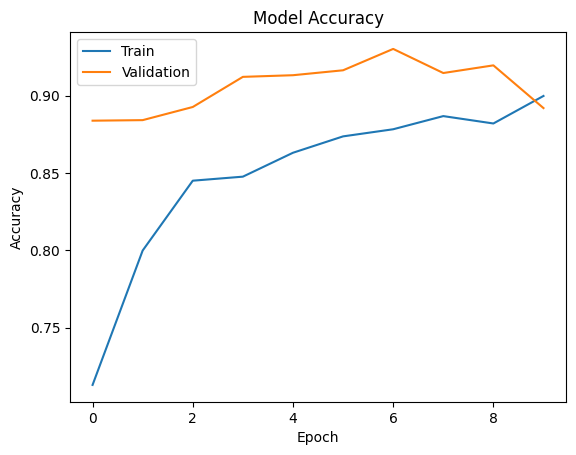

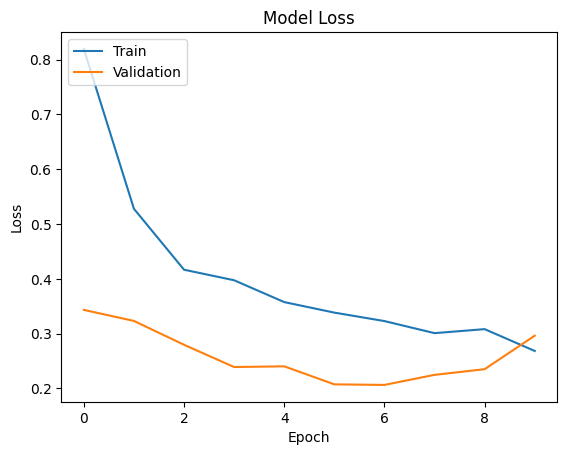

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()